In [14]:
%matplotlib inline


# Gradient Boosting regression


Demonstrate Gradient Boosting on the Boston housing dataset.

This example fits a Gradient Boosting model with least squares loss and
500 regression trees of depth 4.



In [15]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error



Automatically created module for IPython interactive environment


In [16]:
# #############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]



In [17]:
y_test

array([15.6, 28.4, 28.1, 31.2, 13.1, 37.2, 22. , 11.5, 13.8, 39.8, 28.5,
       15.2, 23.8, 19.4, 27.1, 18.9, 17.9, 45.4, 15.6, 21.6, 21.4, 19.9,
       17.8, 23. , 15.4,  8.3, 27. , 36. , 22.8, 17.1, 22.6, 23.9, 17.7,
       31.5,  8.4, 14.5, 13.4, 15.7, 17.5, 15. , 21.8, 18.4, 25.1, 19.4,
       17.6, 18.2, 24.3, 23.1, 24.1, 23.2, 20.6])

In [18]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)



MSE: 6.3650


Text(0,0.5,'Deviance')

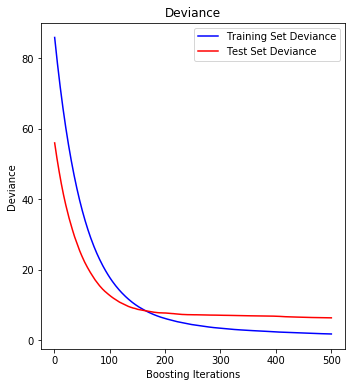

In [19]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



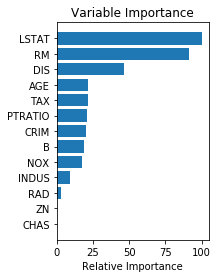

In [20]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()